In [1]:
import pandas as pd
import os

In [2]:
os.chdir(r'C:\\Users\\Eunbyeol\\Desktop\\Dataport\\Data_Analysis_Projects\\Finance\\Home_Credit\\data')

In [3]:
train = pd.read_csv("train.csv")  ## 학습 데이터
train.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,162716,0,0.0,0,1,0,101250.0,480060.0,22509.0,Unaccompanied,...,-2256,NaN,2.0,15,Kindergarten,NaN,0.665732,NaN,-139.0,1.0
1,361317,0,0.0,0,1,2,225000.0,237024.0,12231.0,Unaccompanied,...,-4133,NaN,4.0,3,Business Entity Type 3,0.575699,0.535140,0.670652,-957.0,0.0
2,246925,0,1.0,0,0,0,171000.0,247675.5,26005.5,Unaccompanied,...,-4340,NaN,2.0,10,Business Entity Type 3,0.092273,0.002272,0.154744,-827.0,1.0


In [4]:
print("train_data_shape:" ,train.shape)

train_data_shape: (20000, 26)


In [5]:
test = pd.read_csv("test.csv") ## test 데이터
test.head(3)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,333864,1.0,1,0,1,225000.0,315000.0,16002.0,Unaccompanied,Commercial associate,...,-4549,2.0,2.0,14,Self-employed,NaN,0.664203,0.179822,-1116.0,0.0
1,253018,0.0,0,0,1,90000.0,225000.0,11250.0,Unaccompanied,Working,...,-1928,NaN,3.0,12,Business Entity Type 3,0.399164,0.259984,NaN,-982.0,0.0
2,360625,1.0,0,0,0,202500.0,888840.0,37494.0,Unaccompanied,Working,...,-3740,NaN,1.0,10,Self-employed,0.212372,0.470406,0.234015,-2052.0,2.0


In [6]:
print("test_data_shape:",test.shape)

test_data_shape: (10000, 25)


In [7]:
lb = pd.read_csv("loan_before.csv") ## 각 사람이 이전에 진행했던 대출에 대한 상세 정보
lb.head(3)

,SK_ID_CURR,DAYS_CREDIT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,CREDIT_TYPE
0,400486,-2413,0,180000.0,Consumer credit
1,400486,-941,0,40500.0,Credit card
2,400486,-1110,0,114727.5,Consumer credit


In [8]:
variable_tt = pd.read_excel('variable_explain.xlsx', sheet_name='train,test') 
variable_tt   ##  train.csv, test.csv의 각 변수 설명

,결측치,datatype,설명,col_name
0,0.000,num,유니크한 아이디,SK_ID_CURR
1,0.000,num,"타겟값(0: 정상 상환, 1: 연체 혹은 문제가 생긴 경우)",TARGET
2,0.000,num,"성별(0: 여성, 1: 남성)",CODE_GENDER
3,0.000,num,"차 보유 여부(0: 없음, 1: 있음)",FLAG_OWN_CAR
4,0.000,num,"주택 혹은 아파트 보유 여부(0: 없음, 1: 있음)",FLAG_OWN_REALTY
5,0.000,num,자녀 수,CNT_CHILDREN
6,0.000,num,수입,AMT_INCOME_TOTAL
7,0.000,num,대출금액,AMT_CREDIT
8,0.000,num,1달마다 갚아야 하는 금액,AMT_ANNUITY
9,0.000,cat,대출신청을 할 때 누가 동행했는지,NAME_TYPE_SUITE


In [9]:
variable_lo = pd.read_excel('variable_explain.xlsx', sheet_name='loan_before')
variable_lo  ## loan_before.csv의 각 변수 설명

,결측치,datatype,설명,col_name
0,0,num,유니크한 아이디,SK_ID_CURR
1,0,num,해당 대출이 home credit으로부터 받은 대출보다 며칠 이전에 일어났는지,DAYS_CREDIT
2,0,num,대출 연장을 몇 번 했는지,CNT_CREDIT_PROLONG
3,0,num,대출금액,AMT_CREDIT_SUM
4,0,cat,대출 유형,CREDIT_TYPE


# 1. Questions

<strong>질문 1</strong> - 어떤 요소가 대출금 상환 여부에 큰 영향을 줄 것인가 <br>
<strong>질문 2</strong> - 그 요소들이 상환여부에 어떤 영향을 줄 것인가

# 2. Methods

## 2.1 Analysis process

해석가능한 머신러닝(interpretable machine learning, IML)을 사용하여 이 질문에 대한 해답을 얻고자 하였다.

#### 해석가능한 머신러닝(interpretable machine learning, IML)이란?
모델의 성능 향상에만 초점을 맞추는 것이 아니라, 모델이 예측을 수행하는 과정에 대해 완전히 '이해'하였는지 또한 모델이 늘 예측을 올바르게 수행할 것이라고 충분히 '신뢰'할 수 있는지에 대한 해석력(interpretability)에 더욱 중점을 둔 연구분야로 설명가능한 인공지능(eXplainable AI, XAI)(or interpretable machine learning, IML)이라 한다.

* 1단계 : feature engineering
* 2단계 : machine learning modeling
* 3단계 : shap value를 통해 어떤 변수가 가장 큰 영향을 주는지 알아본다
* 4단계 : 영향을 많이 주는 5개의 변수와 대출금 상환 여부와의 관계를 살펴본다.

## 2.2 feature engineering

AMT_CREDIT에서 AMT_ANNUITY를 나누어 해당 사람이 몇 개월에 걸쳐 돈을 갚아야 하는지 변수화하였다.

In [10]:
train['AMT_CREDIT_TO_ANNUITY_RATIO'] = train['AMT_CREDIT']/train['AMT_ANNUITY']
test['AMT_CREDIT_TO_ANNUITY_RATIO'] = test['AMT_CREDIT']/test['AMT_ANNUITY']

lb(이전에 대출한 정보가 기록된 데이터)를 활용해 변수생성을 시도한다.
<br>

<strong>1. groupby 후 평균(사람 id로 묶은 후 각 변수를 평균을 낸다)</strong><br>
<ul>
    <li>AMT_CREDIT_SUM(이전 대출의 금액)</li>
    <li>DAYS_CREDIT(train,test로부터 며칠 전에 이전 대출을 진행했는지)</li>
    <li>CNT_CREDIT_PROLONG(대출연장을 몇 번 했는지)</li>
</ul>
 
<strong>2. groupby 후 갯수(사람 id별로의 빈도수, 해당 사람이 이전에 대출을 몇 번 진행했는지)</strong>

* SK_ID_CURR : 한 사람이 대출을 여러 번 실행했을 수 있기 때문에 중복 값이 있을 수 있다.

In [11]:
train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(),on='SK_ID_CURR',how='left' )

train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(),on='SK_ID_CURR',how='left' )

train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(),on='SK_ID_CURR',how='left' )

In [12]:
train = pd.merge(train , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')
test = pd.merge(test , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')

해당 프로젝트의 목적은 모델 해석이기 때문에, 이에 방해를 주는 변수는 다 삭제한다.

<strong>제거한 변수목록</strong>
<ul>
    <li>CODE_GENDER : 범주형 변수</li>
    <li>FLAG_OWN_CAR : 범주형 변수</li>
    <li>NAME_TYPE_SUITE : 범주형 변수</li>
    <li>NAME_INCOME_TYPE : 범주형 변수</li>
    <li>NAME_EDUCATION_TYPE : 범주형 변수</li>
    <li>NAME_HOUSING_TYPE : 범주형 변수</li>
    <li>ORGANIZATION_TYPE : 범주형 변수</li>
    <li>EXT_SOURCE_1 : 변수의 의미를 정확히 모름</li>
    <li>EXT_SOURCE_2 : 변수의 의미를 정확히 모름</li>
    <li>EXT_SOURCE_3 : 변수의 의미를 정확히 모름</li>
</ul>

In [13]:
del_list = ['CODE_GENDER','FLAG_OWN_CAR','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [14]:
train = train.drop(del_list,axis=1)
test = test.drop(del_list,axis=1)

In [15]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

## 2.3 모델링

<strong>모델링을 하기 전, 서로 상관관계가 높은 input 변수를 삭제한다.</strong>

이유 : input변수가 높은 상관성을 가질 때, shap value는 제대로 된 설명력을 발휘하지 못한다.

In [16]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

In [17]:
corr = train[input_var].corr()
corr.style.background_gradient(cmap='coolwarm')

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count
FLAG_OWN_REALTY,1.000000,0.008244,0.003243,-0.042446,-0.001448,0.010826,-0.110930,-0.015164,0.004217,0.019393,0.014595,-0.105580,0.026066,0.090058,-0.083920,-0.002745,0.000174,-0.009790,0.008414
CNT_CHILDREN,0.008244,1.000000,0.029879,0.006465,0.023275,-0.033326,0.332123,0.068807,-0.029581,-0.010951,0.883051,-0.009661,-0.006102,-0.036431,-0.022026,0.035864,0.026285,-0.012065,0.002649
AMT_INCOME_TOTAL,0.003243,0.029879,1.000000,0.366717,0.441573,0.185047,0.066875,-0.041696,0.029519,-0.126551,0.029342,0.092505,-0.040823,0.031593,0.077303,0.241929,-0.013266,0.016117,0.116635
AMT_CREDIT,-0.042446,0.006465,0.366717,1.000000,0.770938,0.092177,-0.047089,-0.085049,0.000988,-0.111244,0.066847,0.047472,-0.070924,-0.037907,0.656337,0.135435,-0.068411,-0.000384,0.046902
AMT_ANNUITY,-0.001448,0.023275,0.441573,0.770938,1.000000,0.127204,0.017106,-0.048381,0.013662,-0.108185,0.073912,0.047113,-0.058709,0.000270,0.111694,0.128144,-0.052613,-0.005724,0.013588
REGION_POPULATION_RELATIVE,0.010826,-0.033326,0.185047,0.092177,0.127204,1.000000,-0.023276,0.013870,0.000946,-0.088270,-0.025638,0.182730,-0.051167,0.015725,0.003524,0.077984,-0.010819,0.003701,-0.034289
DAYS_BIRTH,-0.110930,0.332123,0.066875,-0.047089,0.017106,-0.023276,1.000000,0.349373,0.266852,-0.015877,0.283729,0.087200,0.080317,-0.073904,-0.097736,0.053205,0.201829,0.028239,-0.063004
DAYS_EMPLOYED,-0.015164,0.068807,-0.041696,-0.085049,-0.048381,0.013870,0.349373,1.000000,0.093421,0.014016,0.032736,0.003502,0.144221,0.003833,-0.087176,-0.018131,0.160521,0.000124,-0.148704
DAYS_ID_PUBLISH,0.004217,-0.029581,0.029519,0.000988,0.013662,0.000946,0.266852,0.093421,1.000000,0.001141,-0.025311,0.029700,0.089952,-0.039895,-0.020280,0.033384,0.188471,0.022736,-0.100673
OWN_CAR_AGE,0.019393,-0.010951,-0.126551,-0.111244,-0.108185,-0.088270,-0.015877,0.014016,0.001141,1.000000,-0.039362,-0.082672,0.013561,-0.025423,-0.059224,-0.094781,-0.006665,0.011323,-0.025711


높은 상관성을 띄는 변수는 아래와 같다.
<ul>
    <li>CNT_FAM_MEMBERS , CNT_CHILDREN</li>
    <li>AMT_CREDIT_TO_ANNUITY_RATIO , AMT_CREDIT</li>
    <li>AMT_ANNUITY , AMT_CREDIT</li>
</ul>
----------------------------------------------------------------------------------------------

* CNT_FAM_MEMBERS , CNT_CHILDREN

In [18]:
print(train['CNT_FAM_MEMBERS'].corr(train['TARGET']))
print(train['CNT_CHILDREN'].corr(train['TARGET']))

0.018876651698723705
0.025357359317615676


CNT_FAM_MEMBERS와 CNT_CHILDREN 중 타겟값과 높은 결정계수를 가진 변수는 CNT_CHILDREN이므로, CNT_FAM_MEMBERS를 삭제한다.

In [19]:
del train['CNT_FAM_MEMBERS']
del test['CNT_FAM_MEMBERS']

* CAMT_CREDIT_TO_ANNUITY_RATIO , AMT_CREDIT

In [20]:
print(train['AMT_CREDIT_TO_ANNUITY_RATIO'].corr(train['TARGET']))
print(train['AMT_CREDIT'].corr(train['TARGET']))

-0.024740288335190132
-0.02255843084934759


AMT_CREDIT_TO_ANNUITY_RATIO와 AMT_CREDIT 중 타겟값과 높은 결정계수를 가진 변수는 AMT_CREDIT_TO_ANNUITY_RATIO이므로, AMT_CREDIT를 삭제한다.

In [21]:
del train['AMT_CREDIT']
del test['AMT_CREDIT']

-------------------------------------------

In [22]:
print("train_data_shape:" ,train.shape)

train_data_shape: (20000, 19)


In [23]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

In [24]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

<strong>xgboost를 활용해 모델링을 진행한다.</strong>

이유 : shap value를 활용하기 위해선 모델이 랜덤포레스트 형태의 tree형 모델이어야 한다. 이 중에서 xgboost가 속도가 빠르면서 높은 성능을 유지하므로 이를 선택하였다.

In [25]:
from xgboost import XGBClassifier

In [26]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(train[input_var],train['TARGET'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 2.4 shap value 활용
<strong>SHAP (SHapley Additive exPlanations)</strong>이란?
* 학습 데이터와 학습된 모델로 <strong>설명 모델</strong>을 생성하고 새로운 입력 데이터에 대해 shapley value계산을 통해 입력 데이터 features가 학습된 모델 출력 값에 대해 어떤 <strong>공헌도</strong>를 가지는지 설명함으로써 기계학습 모델을 설명하는 방법

In [27]:
import shap
import skimage

In [28]:
shap_values = shap.TreeExplainer(model).shap_values(train[input_var])

In [29]:
shap_values.shape

(20000, 17)

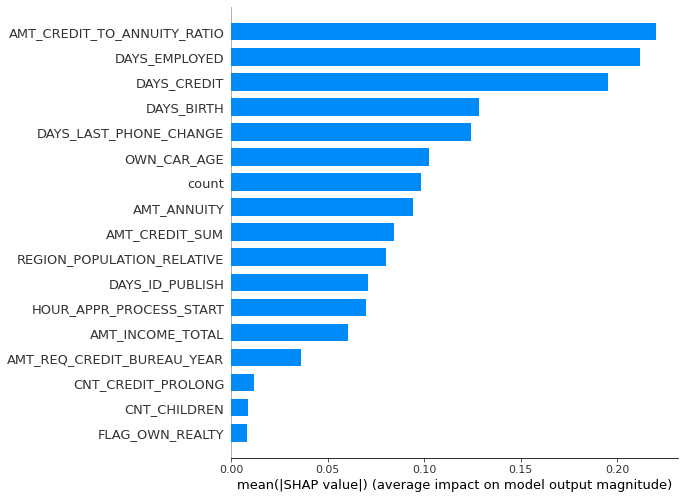

In [30]:
shap.summary_plot(shap_values, train[input_var], plot_type='bar')

시각화 결과, 타겟값에 가장 큰 영향을 미치는 상위 5가지 변수는 아래와 같다.

<ul>
    <li>AMT_CREDIT_TO_ANNUITY_RATIO</li>
    <li>DAYS_EMPLOYED</li>
    <li>DAYS_CREDIT</li>
    <li>DAYS_BIRTH</li>
    <li>DAYS_LAST_PHONE_CHANGE</li>
</ul>

## 2.5 영향을 많이 주는 5개의 변수와 상환 여부와의 관계를 알아본다.

1. AMT_CREDIT_TO_ANNUITY_RATIO

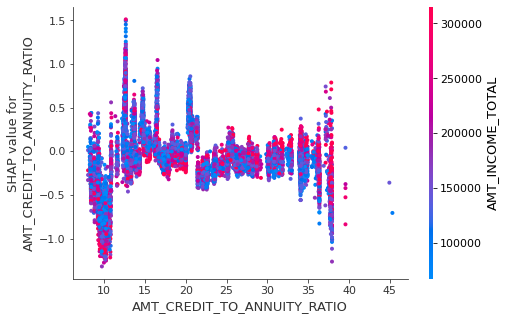

In [31]:
shap.dependence_plot('AMT_CREDIT_TO_ANNUITY_RATIO', shap_values, train[input_var])

대출 상환 기간이 12개월에서 20개월 사이일 때 비교적 상환을 잘 못한다.<br>
반면 12개월 이하, 20개월 이상일 때는 상환을 비교적 잘 한다.

2. DAYS_EMPLOYED

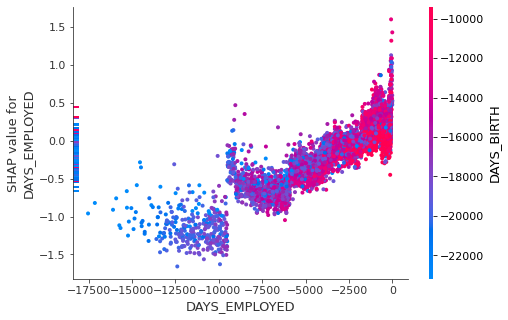

In [32]:
shap.dependence_plot('DAYS_EMPLOYED', shap_values, train[input_var])

취업한지 오래되면 오래될 수록 대출상환확률이 올라간다.<br>
대출일 기준 9000일보다 오래 전에 취업했을 때 대출상환능력이 급상승한다.

3. DAYS_CREDIT

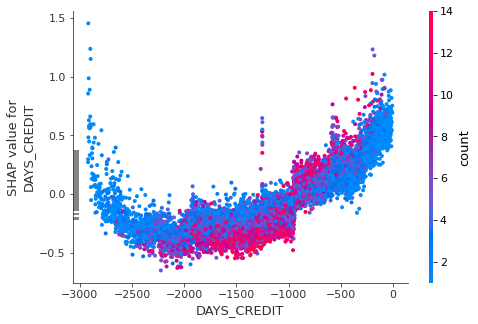

In [33]:
shap.dependence_plot('DAYS_CREDIT', shap_values, train[input_var])

DAYS_CREDIT은 -3000일부터 -2000일까지는 대출상환능력이 상승한다.<br>
그 이후부턴 하락한다.<br>

4. DAYS_BIRTH

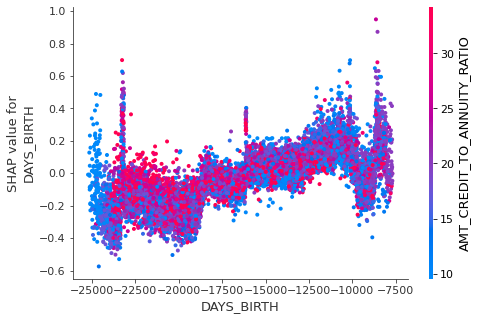

In [34]:
shap.dependence_plot('DAYS_BIRTH', shap_values, train[input_var])

나이가 많으면 많을수록 대출상환을 잘 하는 경향이 있다.

5. DAYS_LAST_PHONE_CHANGE

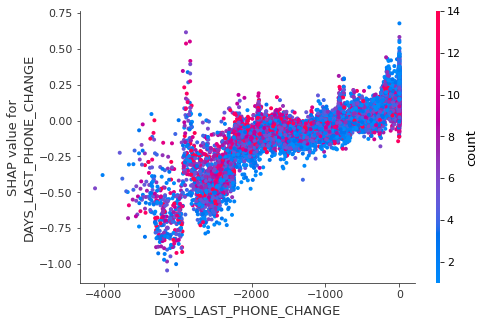

In [35]:
shap.dependence_plot('DAYS_LAST_PHONE_CHANGE', shap_values, train[input_var])

핸드폰을 오래전에 바꾸었을 수록 대출금을 상환할 가능성이 높아진다.

# 3. 결론

1. 대출 상환 기간이 상환여부에 가장 큰 영향을 준다. 해당 영향을 비선형적 관계이다(영향이 크다고 해서 인과관계가 있다고 단정짓긴 어렵다)<br><br>
2. 주택 보유 여부와 자식의 수는 대출 상환능력에 큰 영향을 미치지 않는다.<br><br>
3. 최근에 취업했을 수록, 최근에 대출을 받았을수록, 최근에 핸드폰을 바꿨을 수록, 나이가 어릴수록 대출금 상환 가능성이 낮다.<br>
(DAYS_EMPLOYED, DAYS_CREDIT, DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH가 클수록 대출금 상환 가능성이 낮다)

## 3.1 마무리 시각화

In [36]:
train['DAYS_EMPLOYED'].quantile(0.75) < train['DAYS_EMPLOYED']

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997     True
19998    False
19999    False
Name: DAYS_EMPLOYED, Length: 20000, dtype: bool

In [37]:
## 상위 25%보다 작은 그룹
group1 = train.loc[ (train['DAYS_EMPLOYED'].quantile(0.75)< train['DAYS_EMPLOYED']) &
           (train['DAYS_CREDIT'].quantile(0.75)< train['DAYS_CREDIT']) &
           (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)< train['DAYS_LAST_PHONE_CHANGE']) &
           (train['DAYS_BIRTH'].quantile(0.75)< train['DAYS_BIRTH']) ]

In [38]:
## 하위 25%보다 작은 그룹
group2 = train.loc[ (train['DAYS_EMPLOYED'].quantile(0.25)> train['DAYS_EMPLOYED']) &
           (train['DAYS_CREDIT'].quantile(0.25)> train['DAYS_CREDIT']) &
           (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)> train['DAYS_LAST_PHONE_CHANGE']) &
           (train['DAYS_BIRTH'].quantile(0.25)> train['DAYS_BIRTH']) ]

In [39]:
group1['group'] = 1
group2['group'] = 0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
full = pd.concat([group1,group2],axis=0)
full

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count,group
19,148243,0,1,0,157500.0,29470.5,0.006305,-9946,-694.0,-430,NaN,9,0.0,7.0,20.787296,670500.000000,-291.000000,0.0,1.0,1
97,449339,0,1,0,139500.0,22122.0,0.018801,-8723,-263.0,-1404,13.0,8,-256.0,1.0,24.410090,402856.500000,-449.666667,0.0,6.0,1
104,244014,0,1,0,103500.0,14715.0,0.007020,-12172,-634.0,-2351,NaN,14,-5.0,0.0,31.854128,205537.500000,-345.500000,0.0,2.0,1
130,213561,0,1,2,220500.0,17311.5,0.016612,-10021,-180.0,-2699,20.0,12,-118.0,0.0,26.254224,90000.000000,-204.000000,0.0,1.0,1
187,132571,0,1,0,112500.0,18927.0,0.018029,-9361,-631.0,-2038,NaN,6,-118.0,2.0,21.305516,119263.500000,-374.250000,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18513,350380,0,1,0,157500.0,30645.0,0.046220,-20285,-6106.0,-3830,9.0,17,-2197.0,3.0,25.110132,104065.200000,-1597.500000,0.0,2.0,0
18617,169817,0,1,0,270000.0,30640.5,0.024610,-20163,-8222.0,-3667,NaN,12,-1812.0,3.0,27.840799,105273.125000,-1713.888889,0.0,18.0,0
19773,357658,0,0,0,135000.0,22216.5,0.007305,-19808,-3285.0,-3307,NaN,8,-2459.0,0.0,23.463642,443457.500000,-1568.333333,0.0,9.0,0
19783,255934,0,0,0,382500.0,24403.5,0.025164,-20340,-6993.0,-3798,2.0,16,-1692.0,1.0,34.020284,157494.353226,-1819.451613,0.0,31.0,0


In [41]:
import seaborn as sns

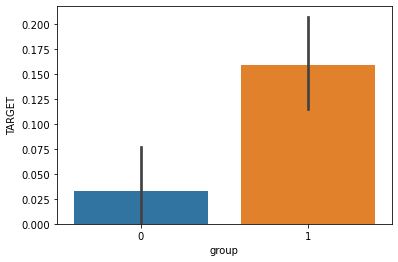

In [42]:
sns.barplot('group','TARGET',data=full)